# Wildfire Data Prediction: Preprocessing
#### Fire Atlas Dataset + NCDC GSOM + NCDC Monthly Normals

Andrew McDonald // CSE 847 // April 2021

In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelBinarizer

pd.set_option("display.max_rows", 11)

In [2]:
data = pd.read_csv("data/usa_2016_wildfires_climate.csv")
data

,fire_ID,latitude,longitude,size,perimeter,start_date,start_DOY,end_date,end_DOY,duration,...,MLY-TMIN-AVGNDS-LSTH060,MLY-TMIN-AVGNDS-LSTH070,MLY-TMIN-NORMAL,MLY-TMIN-PRBOCC-LSTH016,MLY-TMIN-PRBOCC-LSTH020,MLY-TMIN-PRBOCC-LSTH024,MLY-TMIN-PRBOCC-LSTH028,MLY-TMIN-PRBOCC-LSTH032,MLY-TMIN-PRBOCC-LSTH036,MLY-TMIN-STDDEV
0,1,20.8438,-156.4130,0.86,4.63,2016-10-26,300,2016-11-02,307,8,...,-777.7,15.6,20.8,0,0,0,0,0,0,-17.3
1,2,20.8396,-156.4180,1.50,6.48,2016-10-28,302,2016-11-02,307,6,...,-777.7,15.6,20.8,0,0,0,0,0,0,-17.3
2,3,20.8105,-156.4370,0.43,2.78,2016-11-29,334,2016-11-29,334,1,...,0.3,20.4,20.0,0,0,0,0,0,0,-16.9
3,4,20.6271,-156.2470,18.65,30.56,2016-02-16,47,2016-02-20,51,5,...,27.8,28.0,10.9,0,0,0,0,0,0,-16.8
4,5,19.8063,-155.8950,7.72,12.96,2016-03-20,80,2016-03-25,85,6,...,0.1,26.6,19.7,0,0,0,0,0,0,-17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10728,56789,40.8521,-78.1691,0.43,2.78,2016-04-14,105,2016-04-14,105,1,...,29.8,30.0,1.7,212,549,840,972,999,1000,-16.3
10729,56790,40.4188,-76.7056,0.64,3.70,2015-11-14,318,2015-11-14,318,1,...,30.0,30.0,1.7,56,358,765,960,999,1000,-16.4
10730,56791,40.0271,-74.4895,0.86,4.63,2016-06-26,178,2016-07-04,186,9,...,15.4,28.6,14.8,0,0,0,0,0,25,-16.3
10731,56792,40.0063,-74.4994,3.00,9.26,2016-06-13,165,2016-06-19,171,7,...,15.4,28.6,14.8,0,0,0,0,0,25,-16.3


## 1. Drop NA Columns / Rows

In [3]:
# determine columns to drop depending on number of NAs
df = data.describe().T
df

,count,mean,std,min,25%,50%,75%,max
fire_ID,10733.0,20827.142924,9962.978489,1.0000,19265.0000,22257.0000,25104.0000,97710.0000
latitude,10733.0,37.665794,8.633897,19.8063,32.4979,35.7979,40.5979,69.3604
longitude,10733.0,-98.742051,16.718667,-164.9090,-105.7550,-93.8849,-89.7070,-72.2773
size,10733.0,2.623254,17.249257,0.2100,0.2100,0.6400,1.7100,1300.1500
perimeter,10733.0,6.826887,11.944177,1.8500,1.8500,3.7000,7.4100,483.3700
...,...,...,...,...,...,...,...,...
MLY-TMIN-PRBOCC-LSTH024,10733.0,217.019566,337.273137,0.0000,0.0000,11.0000,347.0000,1000.0000
MLY-TMIN-PRBOCC-LSTH028,10733.0,317.435666,382.212265,0.0000,0.0000,96.0000,686.0000,1000.0000
MLY-TMIN-PRBOCC-LSTH032,10733.0,439.003913,411.649592,0.0000,0.0000,334.0000,906.0000,1000.0000
MLY-TMIN-PRBOCC-LSTH036,10733.0,561.243362,422.453698,0.0000,18.0000,715.0000,991.0000,1000.0000


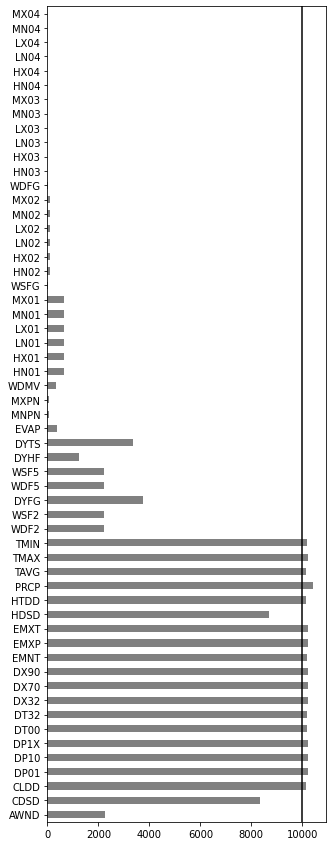

In [4]:
fig, ax = plt.subplots(figsize=(5, 15))
df[df["count"] < data.shape[0]]["count"].plot(kind="barh", color="grey")
plt.axvline(x=10_000, color="k")
plt.show()

In [5]:
# drop columns with large number of missing values
to_drop = df[df["count"] < 10_000].index
data = data.drop([x for x in to_drop if x in data.columns], axis=1)

# then, drop rows with missing values in remaining columns
data = data.dropna()
data

,fire_ID,latitude,longitude,size,perimeter,start_date,start_DOY,end_date,end_DOY,duration,...,MLY-TMIN-AVGNDS-LSTH060,MLY-TMIN-AVGNDS-LSTH070,MLY-TMIN-NORMAL,MLY-TMIN-PRBOCC-LSTH016,MLY-TMIN-PRBOCC-LSTH020,MLY-TMIN-PRBOCC-LSTH024,MLY-TMIN-PRBOCC-LSTH028,MLY-TMIN-PRBOCC-LSTH032,MLY-TMIN-PRBOCC-LSTH036,MLY-TMIN-STDDEV
0,1,20.8438,-156.4130,0.86,4.63,2016-10-26,300,2016-11-02,307,8,...,-777.7,15.6,20.8,0,0,0,0,0,0,-17.3
1,2,20.8396,-156.4180,1.50,6.48,2016-10-28,302,2016-11-02,307,6,...,-777.7,15.6,20.8,0,0,0,0,0,0,-17.3
2,3,20.8105,-156.4370,0.43,2.78,2016-11-29,334,2016-11-29,334,1,...,0.3,20.4,20.0,0,0,0,0,0,0,-16.9
3,4,20.6271,-156.2470,18.65,30.56,2016-02-16,47,2016-02-20,51,5,...,27.8,28.0,10.9,0,0,0,0,0,0,-16.8
5,6,42.2438,-121.8750,0.86,5.56,2016-08-09,222,2016-08-09,222,1,...,31.0,31.0,4.9,0,0,0,106,391,855,-16.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10728,56789,40.8521,-78.1691,0.43,2.78,2016-04-14,105,2016-04-14,105,1,...,29.8,30.0,1.7,212,549,840,972,999,1000,-16.3
10729,56790,40.4188,-76.7056,0.64,3.70,2015-11-14,318,2015-11-14,318,1,...,30.0,30.0,1.7,56,358,765,960,999,1000,-16.4
10730,56791,40.0271,-74.4895,0.86,4.63,2016-06-26,178,2016-07-04,186,9,...,15.4,28.6,14.8,0,0,0,0,0,25,-16.3
10731,56792,40.0063,-74.4994,3.00,9.26,2016-06-13,165,2016-06-19,171,7,...,15.4,28.6,14.8,0,0,0,0,0,25,-16.3


## 2. Extract and Drop Targets

In [6]:
targets = data[["size", "perimeter", "duration"]]
targets.to_csv("data/y.csv", index=False)

In [7]:
predictors = data.drop(["size", "perimeter", "duration"], axis=1)
predictors

,fire_ID,latitude,longitude,start_date,start_DOY,end_date,end_DOY,expansion,fire_line,speed,...,MLY-TMIN-AVGNDS-LSTH060,MLY-TMIN-AVGNDS-LSTH070,MLY-TMIN-NORMAL,MLY-TMIN-PRBOCC-LSTH016,MLY-TMIN-PRBOCC-LSTH020,MLY-TMIN-PRBOCC-LSTH024,MLY-TMIN-PRBOCC-LSTH028,MLY-TMIN-PRBOCC-LSTH032,MLY-TMIN-PRBOCC-LSTH036,MLY-TMIN-STDDEV
0,1,20.8438,-156.4130,2016-10-26,300,2016-11-02,307,0.11,0.23,0.37,...,-777.7,15.6,20.8,0,0,0,0,0,0,-17.3
1,2,20.8396,-156.4180,2016-10-28,302,2016-11-02,307,0.25,0.54,0.57,...,-777.7,15.6,20.8,0,0,0,0,0,0,-17.3
2,3,20.8105,-156.4370,2016-11-29,334,2016-11-29,334,0.43,0.93,0.46,...,0.3,20.4,20.0,0,0,0,0,0,0,-16.9
3,4,20.6271,-156.2470,2016-02-16,47,2016-02-20,51,3.73,6.20,2.68,...,27.8,28.0,10.9,0,0,0,0,0,0,-16.8
5,6,42.2438,-121.8750,2016-08-09,222,2016-08-09,222,0.86,1.85,0.79,...,31.0,31.0,4.9,0,0,0,106,391,855,-16.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10728,56789,40.8521,-78.1691,2016-04-14,105,2016-04-14,105,0.43,0.93,0.46,...,29.8,30.0,1.7,212,549,840,972,999,1000,-16.3
10729,56790,40.4188,-76.7056,2015-11-14,318,2015-11-14,318,0.64,1.39,0.64,...,30.0,30.0,1.7,56,358,765,960,999,1000,-16.4
10730,56791,40.0271,-74.4895,2016-06-26,178,2016-07-04,186,0.10,0.21,0.41,...,15.4,28.6,14.8,0,0,0,0,0,25,-16.3
10731,56792,40.0063,-74.4994,2016-06-13,165,2016-06-19,171,0.43,0.93,0.84,...,15.4,28.6,14.8,0,0,0,0,0,25,-16.3


## 3. Drop Irrelevant Features

In [8]:
# print all columns beginning with a lowercase letter to ignore climatological variables
[col for col in predictors.columns if col[0].islower()]

['fire_ID',
 'latitude',
 'longitude',
 'start_date',
 'start_DOY',
 'end_date',
 'end_DOY',
 'expansion',
 'fire_line',
 'speed',
 'direction',
 'direction_',
 'landcover',
 'landcover_',
 'tile_ID',
 'pop_est',
 'continent',
 'name',
 'iso_a3',
 'gdp_md_est',
 'gsom_station_idx',
 'normal_station_idx',
 'gsom_name',
 'gsom_dataset',
 'gsom_elevation',
 'gsom_mindate',
 'gsom_maxdate',
 'gsom_latitude',
 'gsom_datacoverage',
 'gsom_id',
 'gsom_elevationUnit',
 'gsom_longitude',
 'normal_name',
 'normal_dataset',
 'normal_elevation',
 'normal_mindate',
 'normal_maxdate',
 'normal_latitude',
 'normal_datacoverage',
 'normal_id',
 'normal_elevationUnit',
 'normal_longitude',
 'distance_from_gsom',
 'distance_from_normal',
 'month',
 'date_x',
 'station_x',
 'date_y',
 'station_y']

In [9]:
# drop irrelevant data from fires set
to_drop = ["fire_ID", "tile_ID", "pop_est", "continent", "name", "iso_a3", "gdp_md_est"]

# drop irrelevant/duplicate gsom columns leftover from NCDC data pull
# note that we keep lat/lon/elev for weather stations, as they could differ significantly from fire location
to_drop.extend(["gsom_station_idx", "gsom_name", "gsom_dataset", "gsom_mindate", "gsom_maxdate",
                "gsom_datacoverage", "gsom_id", "gsom_elevationUnit",
                "normal_station_idx", "normal_name", "normal_dataset", "normal_mindate", "normal_maxdate",
                "normal_datacoverage", "normal_id", "normal_elevationUnit",
                "date_x", "station_x", "date_y", "station_y"])

predictors = predictors.drop([x for x in to_drop if x in predictors.columns], axis=1)
[col for col in predictors.columns if col[0].islower()]

['latitude',
 'longitude',
 'start_date',
 'start_DOY',
 'end_date',
 'end_DOY',
 'expansion',
 'fire_line',
 'speed',
 'direction',
 'direction_',
 'landcover',
 'landcover_',
 'gsom_elevation',
 'gsom_latitude',
 'gsom_longitude',
 'normal_elevation',
 'normal_latitude',
 'normal_longitude',
 'distance_from_gsom',
 'distance_from_normal',
 'month']

## 4. Featurize Temporal Predictors

In [10]:
# drop redundant features correlated with month feature
to_drop = ["start_DOY", "end_date", "end_DOY"]
predictors = predictors.drop([x for x in to_drop if x in predictors.columns], axis=1)
[col for col in predictors.columns if col[0].islower()]

['latitude',
 'longitude',
 'start_date',
 'expansion',
 'fire_line',
 'speed',
 'direction',
 'direction_',
 'landcover',
 'landcover_',
 'gsom_elevation',
 'gsom_latitude',
 'gsom_longitude',
 'normal_elevation',
 'normal_latitude',
 'normal_longitude',
 'distance_from_gsom',
 'distance_from_normal',
 'month']

In [11]:
# find non-float or int columns to address
predictors.columns[predictors.dtypes == "O"]

Index(['start_date', 'direction_', 'landcover_', 'DYNT', 'DYSN', 'DYXP',
       'DYXT', 'DYSD'],
      dtype='object')

In [12]:
# convert startdate to day of month as localized local feature
if "start_date" in predictors.columns:        # safeguard against double-conversion
    predictors["start_day_of_month"] = pd.DatetimeIndex(predictors["start_date"]).day
    predictors = predictors.drop("start_date", axis=1)
predictors

,latitude,longitude,expansion,fire_line,speed,direction,direction_,landcover,landcover_,gsom_elevation,...,MLY-TMIN-AVGNDS-LSTH070,MLY-TMIN-NORMAL,MLY-TMIN-PRBOCC-LSTH016,MLY-TMIN-PRBOCC-LSTH020,MLY-TMIN-PRBOCC-LSTH024,MLY-TMIN-PRBOCC-LSTH028,MLY-TMIN-PRBOCC-LSTH032,MLY-TMIN-PRBOCC-LSTH036,MLY-TMIN-STDDEV,start_day_of_month
0,20.8438,-156.4130,0.11,0.23,0.37,3,east,12,Croplands,13.1,...,15.6,20.8,0,0,0,0,0,0,-17.3,26
1,20.8396,-156.4180,0.25,0.54,0.57,4,southeast,12,Croplands,13.1,...,15.6,20.8,0,0,0,0,0,0,-17.3,28
2,20.8105,-156.4370,0.43,0.93,0.46,0,none,12,Croplands,13.1,...,20.4,20.0,0,0,0,0,0,0,-16.9,29
3,20.6271,-156.2470,3.73,6.20,2.68,8,northwest,7,Open shrublands,13.1,...,28.0,10.9,0,0,0,0,0,0,-16.8,16
5,42.2438,-121.8750,0.86,1.85,0.79,0,none,12,Croplands,1258.2,...,31.0,4.9,0,0,0,106,391,855,-16.8,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10728,40.8521,-78.1691,0.43,0.93,0.46,0,none,4,Deciduous Broadleaf forest,524.3,...,30.0,1.7,212,549,840,972,999,1000,-16.3,14
10729,40.4188,-76.7056,0.64,1.39,0.64,0,none,5,Mixed forest,163.7,...,30.0,1.7,56,358,765,960,999,1000,-16.4,14
10730,40.0271,-74.4895,0.10,0.21,0.41,7,west,4,Deciduous Broadleaf forest,30.5,...,28.6,14.8,0,0,0,0,0,25,-16.3,26
10731,40.0063,-74.4994,0.43,0.93,0.84,7,west,5,Mixed forest,30.5,...,28.6,14.8,0,0,0,0,0,25,-16.3,13


In [13]:
# convert other month-wise features into day of month
date_cols = ["DYNT", "DYSN", "DYXP", "DYXT", "DYSD"]
for col in date_cols:
    if predictors[col].dtype == "O":        # safeguard against double-conversion
        predictors[col] = pd.DatetimeIndex(predictors[col]).day
predictors[date_cols]

,DYNT,DYSN,DYXP,DYXT,DYSD
0,29,31,29,20,31
1,29,31,29,20,31
2,27,30,28,7,30
3,8,29,7,16,1
5,31,31,31,19,31
...,...,...,...,...,...
10728,10,9,29,19,9
10729,24,20,29,3,30
10730,16,30,9,21,30
10731,16,30,9,21,30


In [14]:
# apply trig transform to month columns to ensure December-January wrap around
if "month" in predictors:   # safeguard against double-conversion
    predictors["start_month_sin"] = np.sin(2 * np.pi * predictors["month"] / 12)
    predictors["start_month_cos"] = np.cos(2 * np.pi * predictors["month"] / 12)
    predictors = predictors.drop("month", axis=1)
predictors

,latitude,longitude,expansion,fire_line,speed,direction,direction_,landcover,landcover_,gsom_elevation,...,MLY-TMIN-PRBOCC-LSTH016,MLY-TMIN-PRBOCC-LSTH020,MLY-TMIN-PRBOCC-LSTH024,MLY-TMIN-PRBOCC-LSTH028,MLY-TMIN-PRBOCC-LSTH032,MLY-TMIN-PRBOCC-LSTH036,MLY-TMIN-STDDEV,start_day_of_month,start_month_sin,start_month_cos
0,20.8438,-156.4130,0.11,0.23,0.37,3,east,12,Croplands,13.1,...,0,0,0,0,0,0,-17.3,26,-8.660254e-01,0.500000
1,20.8396,-156.4180,0.25,0.54,0.57,4,southeast,12,Croplands,13.1,...,0,0,0,0,0,0,-17.3,28,-8.660254e-01,0.500000
2,20.8105,-156.4370,0.43,0.93,0.46,0,none,12,Croplands,13.1,...,0,0,0,0,0,0,-16.9,29,-5.000000e-01,0.866025
3,20.6271,-156.2470,3.73,6.20,2.68,8,northwest,7,Open shrublands,13.1,...,0,0,0,0,0,0,-16.8,16,8.660254e-01,0.500000
5,42.2438,-121.8750,0.86,1.85,0.79,0,none,12,Croplands,1258.2,...,0,0,0,106,391,855,-16.8,9,-8.660254e-01,-0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10728,40.8521,-78.1691,0.43,0.93,0.46,0,none,4,Deciduous Broadleaf forest,524.3,...,212,549,840,972,999,1000,-16.3,14,8.660254e-01,-0.500000
10729,40.4188,-76.7056,0.64,1.39,0.64,0,none,5,Mixed forest,163.7,...,56,358,765,960,999,1000,-16.4,14,-5.000000e-01,0.866025
10730,40.0271,-74.4895,0.10,0.21,0.41,7,west,4,Deciduous Broadleaf forest,30.5,...,0,0,0,0,0,25,-16.3,26,1.224647e-16,-1.000000
10731,40.0063,-74.4994,0.43,0.93,0.84,7,west,5,Mixed forest,30.5,...,0,0,0,0,0,25,-16.3,13,1.224647e-16,-1.000000


## 5. One-Hot Encode Landcover and Direction

In [15]:
if "direction" in predictors.columns:   # safeguard against double-conversion
    directions = pd.get_dummies(predictors["direction_"])
    directions.columns = [f"dir_{d.replace(' ', '_')}" for d in directions.columns]
    predictors = predictors.drop(["direction", "direction_"], axis=1)

if "landcover" in predictors.columns:   # safeguard against double-conversion
    landcover = pd.get_dummies(predictors["landcover_"])
    landcover.columns = [f"land_{l.replace(' ', '_')}" for l in landcover.columns]
    predictors = predictors.drop(["landcover", "landcover_"], axis=1)

if "dir_east" not in predictors.columns:    # safeguard against double-conversion
    predictors = pd.concat((predictors, directions, landcover), axis=1)

predictors

,latitude,longitude,expansion,fire_line,speed,gsom_elevation,gsom_latitude,gsom_longitude,normal_elevation,normal_latitude,...,land_Deciduous_Broadleaf_forest,land_Evergreen_Broadleaf_forest,land_Evergreen_Needleleaf_forest,land_Grasslands,land_Mixed_forest,land_Open_shrublands,land_Savannas,land_Urban_and_built-up,land_Water,land_Woody_savannas
0,20.8438,-156.4130,0.11,0.23,0.37,13.1,19.73556,-156.04889,15.5,20.89972,...,0,0,0,0,0,0,0,0,0,0
1,20.8396,-156.4180,0.25,0.54,0.57,13.1,19.73556,-156.04889,15.5,20.89972,...,0,0,0,0,0,0,0,0,0,0
2,20.8105,-156.4370,0.43,0.93,0.46,13.1,19.73556,-156.04889,15.5,20.89972,...,0,0,0,0,0,0,0,0,0,0
3,20.6271,-156.2470,3.73,6.20,2.68,13.1,19.73556,-156.04889,923.5,20.70090,...,0,0,0,0,0,1,0,0,0,0
5,42.2438,-121.8750,0.86,1.85,0.79,1258.2,42.09454,-121.90211,1274.1,42.70360,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10728,40.8521,-78.1691,0.43,0.93,0.46,524.3,40.87291,-78.21615,524.3,40.87291,...,1,0,0,0,0,0,0,0,0,0
10729,40.4188,-76.7056,0.64,1.39,0.64,163.7,40.46093,-76.74870,95.1,40.19620,...,0,0,0,0,1,0,0,0,0,0
10730,40.0271,-74.4895,0.10,0.21,0.41,30.5,40.26639,-74.56417,18.3,39.97083,...,1,0,0,0,0,0,0,0,0,0
10731,40.0063,-74.4994,0.43,0.93,0.84,30.5,40.26639,-74.56417,18.3,39.97083,...,0,0,0,0,1,0,0,0,0,0


In [16]:
[col for col in predictors.columns if col[0].islower()]


['latitude',
 'longitude',
 'expansion',
 'fire_line',
 'speed',
 'gsom_elevation',
 'gsom_latitude',
 'gsom_longitude',
 'normal_elevation',
 'normal_latitude',
 'normal_longitude',
 'distance_from_gsom',
 'distance_from_normal',
 'start_day_of_month',
 'start_month_sin',
 'start_month_cos',
 'dir_east',
 'dir_none',
 'dir_north',
 'dir_northwest',
 'dir_south',
 'dir_southeast',
 'dir_west',
 'land_Barren_or_sparsely_vegetated',
 'land_Closed_shrublands',
 'land_Croplands',
 'land_Deciduous_Broadleaf_forest',
 'land_Evergreen_Broadleaf_forest',
 'land_Evergreen_Needleleaf_forest',
 'land_Grasslands',
 'land_Mixed_forest',
 'land_Open_shrublands',
 'land_Savannas',
 'land_Urban_and_built-up',
 'land_Water',
 'land_Woody_savannas']

## 6. Sanity Check Distributions

In [17]:
with pd.option_context("display.max_columns", None):
    display(predictors.describe())

,latitude,longitude,expansion,fire_line,speed,gsom_elevation,gsom_latitude,gsom_longitude,normal_elevation,normal_latitude,normal_longitude,distance_from_gsom,distance_from_normal,CLDD,DP01,DP10,DP1X,DSNW,DT00,DT32,DX32,DX70,DX90,DYNT,DYSN,DYXP,DYXT,EMNT,EMSN,EMXP,EMXT,HTDD,PRCP,SNOW,TAVG,TMAX,TMIN,DSND,DYSD,EMSD,MLY-CLDD-BASE45,MLY-CLDD-BASE50,MLY-CLDD-BASE55,MLY-CLDD-BASE57,MLY-CLDD-BASE60,MLY-CLDD-BASE70,MLY-CLDD-BASE72,MLY-CLDD-NORMAL,MLY-DUTR-NORMAL,MLY-DUTR-STDDEV,MLY-GRDD-BASE40,MLY-GRDD-BASE45,MLY-GRDD-BASE50,MLY-GRDD-BASE55,MLY-GRDD-BASE57,MLY-GRDD-BASE60,MLY-GRDD-BASE65,MLY-GRDD-BASE70,MLY-GRDD-BASE72,MLY-GRDD-TB4886,MLY-GRDD-TB5086,MLY-HTDD-BASE40,MLY-HTDD-BASE45,MLY-HTDD-BASE50,MLY-HTDD-BASE55,MLY-HTDD-BASE57,MLY-HTDD-BASE60,MLY-HTDD-NORMAL,MLY-PRCP-25PCTL,MLY-PRCP-50PCTL,MLY-PRCP-75PCTL,MLY-PRCP-AVGNDS-GE001HI,MLY-PRCP-AVGNDS-GE010HI,MLY-PRCP-AVGNDS-GE050HI,MLY-PRCP-AVGNDS-GE100HI,MLY-PRCP-NORMAL,MLY-SNOW-25PCTL,MLY-SNOW-50PCTL,MLY-SNOW-75PCTL,MLY-SNOW-AVGNDS-GE001TI,MLY-SNOW-AVGNDS-GE010TI,MLY-SNOW-AVGNDS-GE030TI,MLY-SNOW-AVGNDS-GE050TI,MLY-SNOW-AVGNDS-GE100TI,MLY-SNOW-NORMAL,MLY-SNWD-AVGNDS-GE001WI,MLY-SNWD-AVGNDS-GE003WI,MLY-SNWD-AVGNDS-GE005WI,MLY-SNWD-AVGNDS-GE010WI,MLY-TAVG-NORMAL,MLY-TAVG-STDDEV,MLY-TMAX-AVGNDS-GRTH040,MLY-TMAX-AVGNDS-GRTH050,MLY-TMAX-AVGNDS-GRTH060,MLY-TMAX-AVGNDS-GRTH070,MLY-TMAX-AVGNDS-GRTH080,MLY-TMAX-AVGNDS-GRTH090,MLY-TMAX-AVGNDS-GRTH100,MLY-TMAX-AVGNDS-LSTH032,MLY-TMAX-NORMAL,MLY-TMAX-STDDEV,MLY-TMIN-AVGNDS-LSTH000,MLY-TMIN-AVGNDS-LSTH010,MLY-TMIN-AVGNDS-LSTH020,MLY-TMIN-AVGNDS-LSTH032,MLY-TMIN-AVGNDS-LSTH040,MLY-TMIN-AVGNDS-LSTH050,MLY-TMIN-AVGNDS-LSTH060,MLY-TMIN-AVGNDS-LSTH070,MLY-TMIN-NORMAL,MLY-TMIN-PRBOCC-LSTH016,MLY-TMIN-PRBOCC-LSTH020,MLY-TMIN-PRBOCC-LSTH024,MLY-TMIN-PRBOCC-LSTH028,MLY-TMIN-PRBOCC-LSTH032,MLY-TMIN-PRBOCC-LSTH036,MLY-TMIN-STDDEV,start_day_of_month,start_month_sin,start_month_cos,dir_east,dir_none,dir_north,dir_northwest,dir_south,dir_southeast,dir_west,land_Barren_or_sparsely_vegetated,land_Closed_shrublands,land_Croplands,land_Deciduous_Broadleaf_forest,land_Evergreen_Broadleaf_forest,land_Evergreen_Needleleaf_forest,land_Grasslands,land_Mixed_forest,land_Open_shrublands,land_Savannas,land_Urban_and_built-up,land_Water,land_Woody_savannas
count,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.00000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9.925000e+03,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000
mean,37.187872,-97.760112,0.470421,0.876926,0.797414,399.065048,37.1

## 7. Standardize Features for Learning

In [18]:
predictors = predictors.reset_index(drop=True)
ohe_columns = np.array([(x.startswith("land") or x.startswith("dir")) for x in predictors.columns])
numeric_columns = np.logical_not(ohe_columns)

X_numeric, X_ohe = predictors.loc[:, numeric_columns], predictors.loc[:, ohe_columns]
display(X_numeric.head(1))
display(X_ohe.head(1))

,latitude,longitude,expansion,fire_line,speed,gsom_elevation,gsom_latitude,gsom_longitude,normal_elevation,normal_latitude,...,MLY-TMIN-PRBOCC-LSTH016,MLY-TMIN-PRBOCC-LSTH020,MLY-TMIN-PRBOCC-LSTH024,MLY-TMIN-PRBOCC-LSTH028,MLY-TMIN-PRBOCC-LSTH032,MLY-TMIN-PRBOCC-LSTH036,MLY-TMIN-STDDEV,start_day_of_month,start_month_sin,start_month_cos
0,20.8438,-156.413,0.11,0.23,0.37,13.1,19.73556,-156.04889,15.5,20.89972,...,0,0,0,0,0,0,-17.3,26,-0.866025,0.5


,dir_east,dir_none,dir_north,dir_northwest,dir_south,dir_southeast,dir_west,land_Barren_or_sparsely_vegetated,land_Closed_shrublands,land_Croplands,land_Deciduous_Broadleaf_forest,land_Evergreen_Broadleaf_forest,land_Evergreen_Needleleaf_forest,land_Grasslands,land_Mixed_forest,land_Open_shrublands,land_Savannas,land_Urban_and_built-up,land_Water,land_Woody_savannas
0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [19]:
scaler = StandardScaler()
X = scaler.fit_transform(X_numeric.values)
X_numeric = pd.DataFrame(X, columns=X_numeric.columns)
X_numeric

,latitude,longitude,expansion,fire_line,speed,gsom_elevation,gsom_latitude,gsom_longitude,normal_elevation,normal_latitude,...,MLY-TMIN-PRBOCC-LSTH016,MLY-TMIN-PRBOCC-LSTH020,MLY-TMIN-PRBOCC-LSTH024,MLY-TMIN-PRBOCC-LSTH028,MLY-TMIN-PRBOCC-LSTH032,MLY-TMIN-PRBOCC-LSTH036,MLY-TMIN-STDDEV,start_day_of_month,start_month_sin,start_month_cos
0,-2.037295,-3.775066,-0.252021,-0.463854,-0.521389,-0.666190,-2.210360,-3.751664,-0.669767,-2.066734,...,-0.408395,-0.507280,-0.651534,-0.839668,-1.071571,-1.322137,-2.480241,1.460410,-0.900740,0.970479
1,-2.037819,-3.775388,-0.154127,-0.241580,-0.277415,-0.666190,-2.210360,-3.751664,-0.669767,-2.066734,...,-0.408395,-0.507280,-0.651534,-0.839668,-1.071571,-1.322137,-2.480241,1.682043,-0.900740,0.970479
2,-2.041446,-3.776611,-0.028264,0.038055,-0.411601,-0.666190,-2.210360,-3.751664,-0.669767,-2.066734,...,-0.408395,-0.507280,-0.651534,-0.839668,-1.071571,-1.322137,-1.567576,1.792859,-0.447716,1.612304
3,-2.064307,-3.764382,2.279230,3.816712,2.296511,-0.666190,-2.210360,-3.751664,0.935630,-2.092022,...,-0.408395,-0.507280,-0.651534,-0.839668,-1.071571,-1.322137,-1.339410,0.352246,1.242996,0.970479
4,0.630224,-1.552103,0.272409,0.697706,-0.009044,1.482899,0.627030,-1.554420,1.555511,0.706526,...,-0.408395,-0.507280,-0.651534,-0.563453,-0.125569,0.690979,-1.339410,-0.423469,-0.900740,-0.783021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9920,0.456748,1.260933,-0.028264,0.038055,-0.411601,0.216160,0.472003,1.256642,0.229821,0.473678,...,0.477476,1.380670,1.827018,1.693170,1.345452,1.032384,-0.198579,0.130613,1.242996,-0.783021
9921,0.402737,1.355128,0.118576,0.367881,-0.192024,-0.406249,0.419722,1.351068,-0.529029,0.387607,...,-0.174391,0.723842,1.605718,1.661901,1.345452,1.032384,-0.426745,0.130613,-0.447716,1.612304
9922,0.353911,1.497763,-0.259014,-0.478194,-0.472594,-0.636157,0.395035,1.491636,-0.664816,0.358942,...,-0.408395,-0.507280,-0.651534,-0.839668,-1.071571,-1.263274,-0.198579,1.460410,0.171128,-1.659771
9923,0.351318,1.497125,-0.028264,0.038055,0.051950,-0.636157,0.395035,1.491636,-0.664816,0.358942,...,-0.408395,-0.507280,-0.651534,-0.839668,-1.071571,-1.263274,-0.198579,0.019796,0.171128,-1.659771


## 8. Preview and Save Final Preprocessed Features

In [20]:
predictors_scaled = pd.concat((X_numeric, X_ohe), axis=1)
predictors_scaled

,latitude,longitude,expansion,fire_line,speed,gsom_elevation,gsom_latitude,gsom_longitude,normal_elevation,normal_latitude,...,land_Deciduous_Broadleaf_forest,land_Evergreen_Broadleaf_forest,land_Evergreen_Needleleaf_forest,land_Grasslands,land_Mixed_forest,land_Open_shrublands,land_Savannas,land_Urban_and_built-up,land_Water,land_Woody_savannas
0,-2.037295,-3.775066,-0.252021,-0.463854,-0.521389,-0.666190,-2.210360,-3.751664,-0.669767,-2.066734,...,0,0,0,0,0,0,0,0,0,0
1,-2.037819,-3.775388,-0.154127,-0.241580,-0.277415,-0.666190,-2.210360,-3.751664,-0.669767,-2.066734,...,0,0,0,0,0,0,0,0,0,0
2,-2.041446,-3.776611,-0.028264,0.038055,-0.411601,-0.666190,-2.210360,-3.751664,-0.669767,-2.066734,...,0,0,0,0,0,0,0,0,0,0
3,-2.064307,-3.764382,2.279230,3.816712,2.296511,-0.666190,-2.210360,-3.751664,0.935630,-2.092022,...,0,0,0,0,0,1,0,0,0,0
4,0.630224,-1.552103,0.272409,0.697706,-0.009044,1.482899,0.627030,-1.554420,1.555511,0.706526,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9920,0.456748,1.260933,-0.028264,0.038055,-0.411601,0.216160,0.472003,1.256642,0.229821,0.473678,...,1,0,0,0,0,0,0,0,0,0
9921,0.402737,1.355128,0.118576,0.367881,-0.192024,-0.406249,0.419722,1.351068,-0.529029,0.387607,...,0,0,0,0,1,0,0,0,0,0
9922,0.353911,1.497763,-0.259014,-0.478194,-0.472594,-0.636157,0.395035,1.491636,-0.664816,0.358942,...,1,0,0,0,0,0,0,0,0,0
9923,0.351318,1.497125,-0.028264,0.038055,0.051950,-0.636157,0.395035,1.491636,-0.664816,0.358942,...,0,0,0,0,1,0,0,0,0,0


In [21]:
predictors_scaled.to_csv("data/X.csv", index=False)
